Let's look at the data we got from Tüebingen

In [8]:
import os
import glob
import imageio
import pydicom
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_scalebar.scalebar import ScaleBar
import platform

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Display and output defaults
plt.rc('image', cmap='gray', interpolation='nearest')  # Display all images in b&w and with 'nearest' interpolation
plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit
plt.rcParams['savefig.dpi'] = 300  # Save (PNG) images with a higher DPI, since Authorea cannot import PDFs...
plt.rcParams["savefig.transparent"] = True

In [24]:
# Setup scale bar
plt.rcParams['scalebar.location'] = 'lower right'
plt.rcParams['scalebar.frameon'] = False
plt.rcParams['scalebar.color'] = 'white'

In [25]:
if 'debian' in platform.dist():
    # StartPath = '/home/habi/q5/Tuebingen'
    StartPath = '/media/habi/Fast_SSD/Tuebingen'
else:
    StartPath = os.path.join('F:/', 'Tuebingen')
print('We are loading all the data from %s' % StartPath)

We are loading all the data from F:/Tuebingen


In [26]:
# We have two scans
Scans = sorted(next(os.walk(StartPath))[1])

In [27]:
Scans

['JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v1',
 'JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v2']

In [28]:
# The DICOM files are nested in two subfolders, let's get them
subfolder = [os.listdir(os.path.join(StartPath, scan))[0] for scan in Scans]
subsubfolder = [os.listdir(os.path.join(StartPath, scan, sf))[0] for scan, sf in zip(Scans, subfolder)]

In [29]:
# Construct the full DICOM folder paths
DICOMFolders = [os.path.join(StartPath, scan, sf, ssf) for scan, sf, ssf in zip(Scans,
                                                                                subfolder,
                                                                                subsubfolder)]

In [30]:
DICOMFolders

['F:/Tuebingen\\JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v1\\1.2.826.0.1.3417726.3.298629016\\1.2.826.0.1.3417726.3.597279.20180920091049540',
 'F:/Tuebingen\\JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v2\\1.2.826.0.1.3417726.3.596889904\\1.2.826.0.1.3417726.3.552784.20180920091049665']

In [31]:
# Get all the file names
DICOMFiles = [sorted(glob.glob(os.path.join(df, '*.dcm'))) for df in DICOMFolders]

In [32]:
# Read DICOM files
# Based on https://imageio.readthedocs.io/en/stable/examples.html#read-medical-data-dicom
# and prior work
# vol = imageio.volread(DICOMFolders[0], 'DICOM'
OutFile = [os.path.join(StartPath, s, s + '.npy') for s in Scans]
DICOM = [numpy.nan for s in Scans]

for c,s in enumerate(Scans):
    # Only do this if we didn't do it already...
    if os.path.exists(OutFile[c]):
        print('%s/%s\n%s\nAlready saved to %s' % (c + 1,
                                                  len(Scans),
                                                  Scans[c],
                                                  OutFile[c][len(StartPath):]))
        DICOM[c] = numpy.load(OutFile[c], mmap_mode='r')
    else:
        print('%s/%s\n%s\nReading %4s DICOM files' % (c + 1,
                                                      len(Scans),
                                                      Scans[c],
                                                      len(DICOMFiles[c])))
        # Actually load the images now
        DICOM[c] = imageio.volread(DICOMFolders[c], 'DICOM')
        print('Saving to %s' % OutFile[c])
        numpy.save(OutFile[c], DICOM[c], allow_pickle=False)

1/2
JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v1
Already saved to \JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v1\JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v1.npy
2/2
JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v2
Already saved to \JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v2\JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v2.npy


In [33]:
# What do we have?
for c, scn in enumerate(Scans):
    print('%s' % scn)
    print('\t- has %s files in %s' % (len(DICOMFiles[c]),
                                      os.path.basename(DICOMFolders[c])))
    print('\t- with a size of %sx%spx' % (numpy.shape(DICOM[c])[1],
                                          numpy.shape(DICOM[c])[2]))

JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v1
	- has 1024 files in 1.2.826.0.1.3417726.3.597279.20180920091049540
	- with a size of 1536x1536px
JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v2
	- has 1024 files in 1.2.826.0.1.3417726.3.552784.20180920091049665
	- with a size of 1536x1536px


In [34]:
# Get pixelsize with pydicom
# According to ImageJ, the pixel size is "Pixel size: 0.0187x0.0187 mm^2"
pixelsize = []
for c,i in enumerate(DICOMFiles):
    # Read the pixel size of five random files in each directory
    # This should be the same each and every time :)
    for k in range(5):
        _ = pydicom.dcmread(i[numpy.random.randint(len(i))])
        print(_.PixelSpacing)
        pixelsize.append(_.PixelSpacing[0])
        pixelsize.append(_.PixelSpacing[1])

['1.8675E-2', '1.8675E-2']
['1.8675E-2', '1.8675E-2']
['1.8675E-2', '1.8675E-2']
['1.8675E-2', '1.8675E-2']
['1.8675E-2', '1.8675E-2']
['1.8675E-2', '1.8675E-2']
['1.8675E-2', '1.8675E-2']
['1.8675E-2', '1.8675E-2']
['1.8675E-2', '1.8675E-2']
['1.8675E-2', '1.8675E-2']


In [35]:
pixelsize = numpy.unique(pixelsize)
print('The pixelsize is %s um' % (pixelsize[0] * 1000))

The pixelsize is 18.675 um


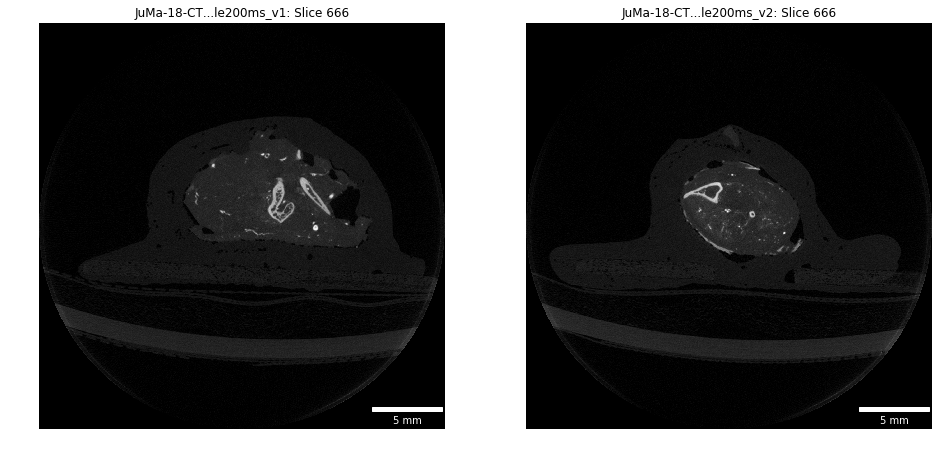

In [36]:
# Show us a file
imagenumber = 666
for c,s in enumerate(Scans):
    plt.subplot(1,2,c+1)
    plt.imshow(DICOM[c][imagenumber])
    plt.gca().add_artist(ScaleBar(pixelsize, 'mm'))
    plt.axis('off')
    plt.title('%s...%s: Slice %s' % (s[:10], s[-10:], imagenumber))
plt.show()

In [37]:
# Save output in the base folder of the scan
OutputPath = [os.path.dirname(os.path.dirname(df)) for df in DICOMFolders]

In [48]:
# Generate or read MIPs
directions = ['axial', 'coronal', 'sagittal']
MIPNames = [numpy.nan for s in Scans]
MIPs = [numpy.nan for s in Scans]
for c,s in enumerate(Scans):
    MIPNames[c] = [os.path.join(OutputPath[c], 'MIP_' + d + '.png') for d in directions]
    MIPs[c] = [numpy.nan for d in directions]
    for d,direction in enumerate(directions):
        print('Scan %s, direction %s' % (c, d))
        if os.path.exists(MIPNames[c][d]):
            print('\tReading %s' % MIPNames[c][d])
            MIPs[c][d] = imageio.imread(MIPNames[c][d])
        else:
            print('\tGenerating %s' % MIPNames[c][d])
            MIPs[c][d] = numpy.max(DICOM[c], axis=d)
            print('\tSaving %s' % MIPNames[c][d])
            imageio.imsave(MIPNames[c][d], MIPs[c][d])

Scan 0, direction 0
	Reading F:/Tuebingen\JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v1\MIP_axial.png
Scan 0, direction 1
	Reading F:/Tuebingen\JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v1\MIP_coronal.png
Scan 0, direction 2
	Reading F:/Tuebingen\JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v1\MIP_sagittal.png
Scan 1, direction 0
	Reading F:/Tuebingen\JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v2\MIP_axial.png
Scan 1, direction 1
	Reading F:/Tuebingen\JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v2\MIP_coronal.png
Scan 1, direction 2
	Reading F:/Tuebingen\JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v2\MIP_sagittal.png


axial
coronal
sagittal


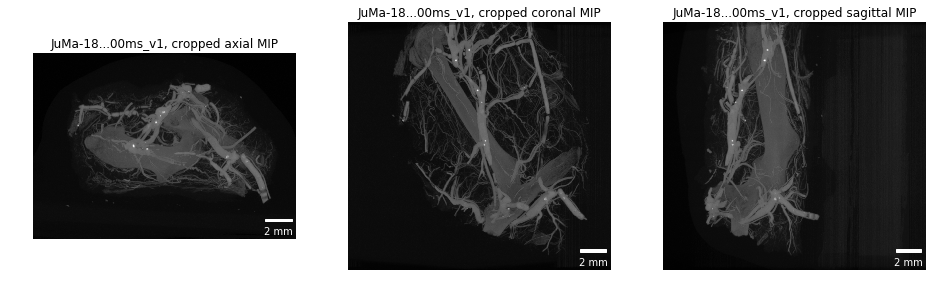

axial
coronal
sagittal


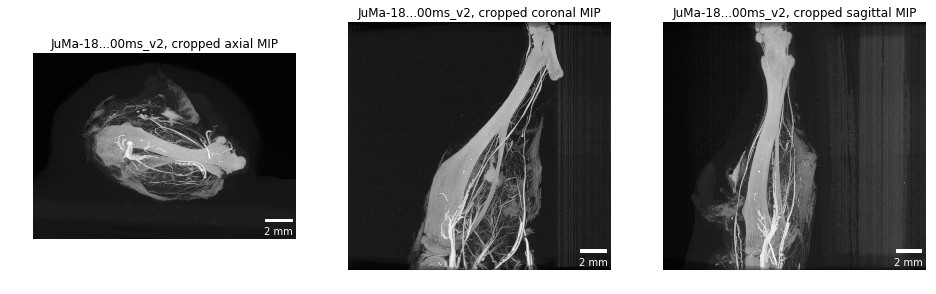

In [47]:
# Show MIPs
namelen = 7
crop = True
for c,s in enumerate(Scans):
    for d, direction in enumerate(directions):
        plt.subplot(1,3,d+1)
        if crop:
            if d:
                # coronal and sagittal
                # only crop horizontally
                plt.imshow(MIPs[c][d][:,250:-200])
            else:
                # axial
                plt.imshow(MIPs[c][d][300:-500,300:-200])
            plt.title('%s...%s, cropped %s MIP' % (s[:namelen],
                                                   s[-namelen:],
                                                   directions[d]))
        else:
            plt.imshow(MIPs[c][d])
            plt.title('%s...%s, %s MIP' % (s[:namelen],
                                           s[-namelen:],
                                           directions[d]))
                       
        plt.gca().add_artist(ScaleBar(pixelsize, 'mm'))
        plt.axis('off')
    plt.savefig(os.path.join(OutputPath[c], '%s_MIPs.png' % Scans[c]))
    plt.show()

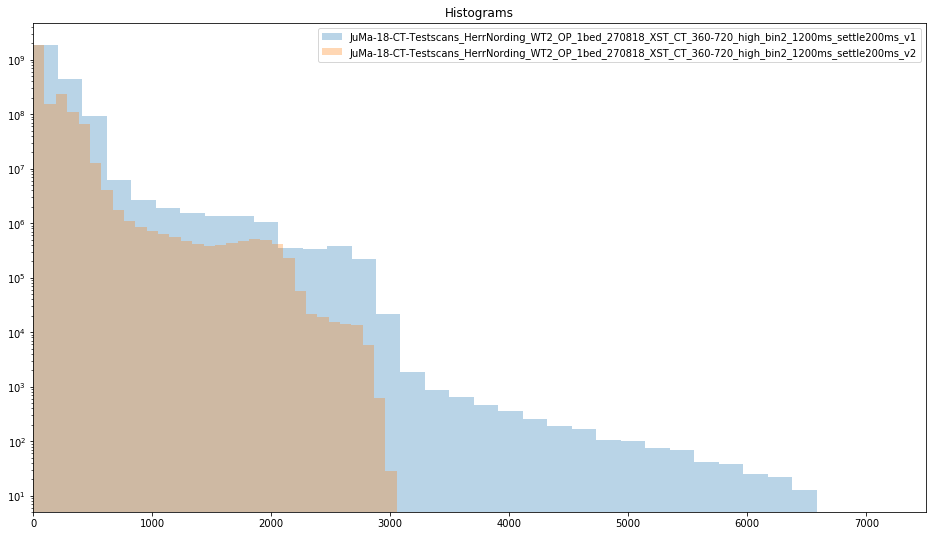

In [40]:
for c,s in enumerate(Scans):
    plt.hist(DICOM[c].ravel(), bins=32, log=True, label=s, alpha=.309)
    plt.title('Histograms')
    plt.legend()
    plt.xlim([0,7500])
plt.show()

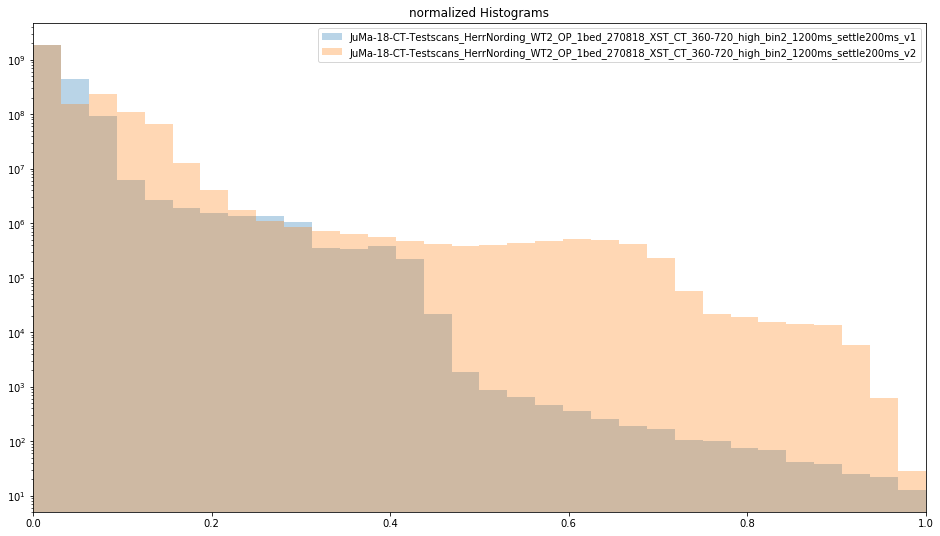

In [41]:
for c,s in enumerate(Scans):
    plt.hist((DICOM[c]/numpy.max(DICOM[c])).ravel(), bins=32, log=True, label=s, alpha=.309)
    plt.title('normalized Histograms')
    plt.legend()
    plt.xlim([0,1])
plt.show()

('F:/Tuebingen\\JuMa-18-CT-Testscans_HerrNording_WT2_OP_1bed_270818_XST_CT_360-720_high_bin2_1200ms_settle200ms_v1\\1.2.826.0.1.3417726.3.298629016\\1.2.826.0.1.3417726.3.597279.20180920091049540', '1.2.826.0.1.3417726.3.564600.20180920091256501.dcm')


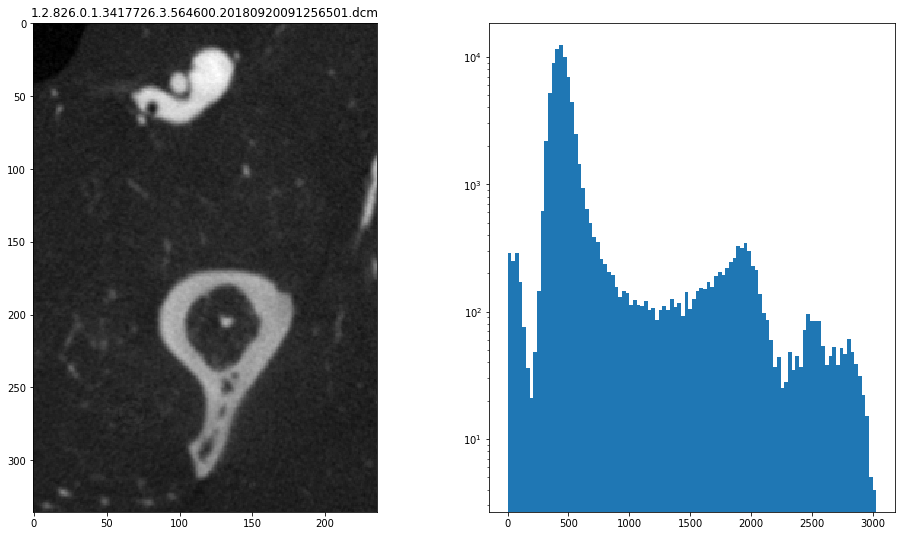

In [42]:
slice_nr = 512
rec = DICOM[0][slice_nr][400+100:-600-100,450+250:-250-350]
print(os.path.split(DICOMFiles[0][slice_nr]))
plt.subplot(121)
plt.imshow(rec)
plt.title(os.path.basename(DICOMFiles[0][slice_nr]))
plt.subplot(122)
plt.hist(rec.ravel(), log=True, bins=100)
plt.show()

In [43]:
threshold_vessels = 2500
threshold_bone = 1500
around = 500

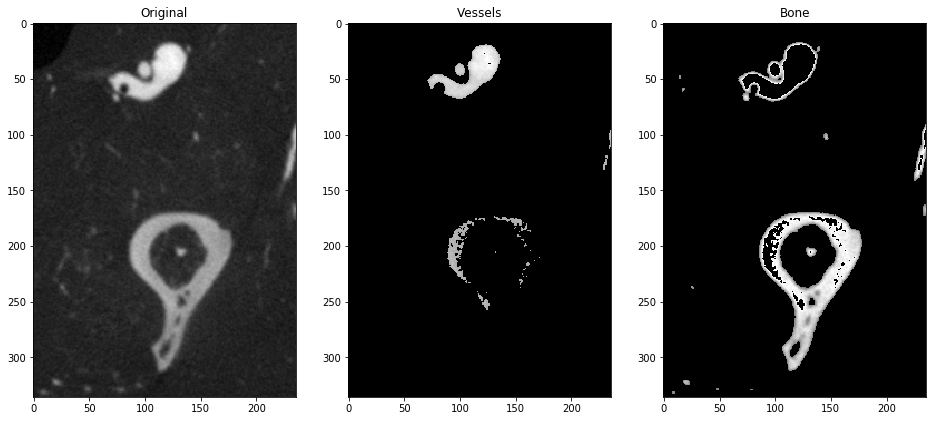

In [44]:
plt.subplot(131)
plt.title('Original')
plt.imshow(rec)
plt.subplot(132)
plt.title('Vessels')
plt.imshow(numpy.ma.masked_outside(rec,
                                   threshold_vessels - around,
                                   threshold_vessels + around).filled(0))
plt.subplot(133)
plt.title('Bone')
plt.imshow(numpy.ma.masked_outside(rec,
                                   threshold_bone - around,
                                   threshold_bone + around).filled(0))

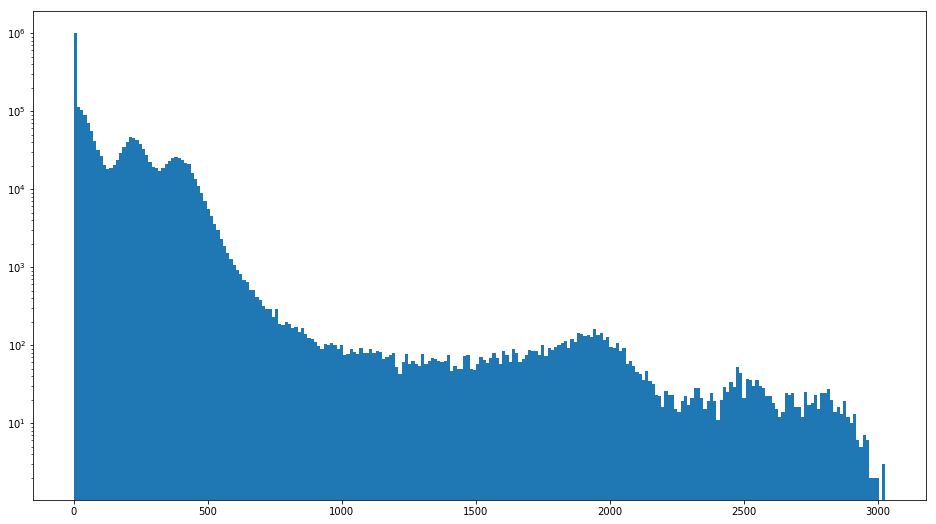

In [45]:
plt.hist(DICOM[0][slice_nr].ravel(), bins=250, log=True)
plt.show()